In [2]:
! pip install spacy
! python -m spacy download es_core_news_sm
! pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 74.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.8 MB/s eta 0:00:00


# Proceso de categorización de la variable 25

### Normalización de las respuestas

A partir de la recolección de las respuestas de la pregunta se procede a _normalizar_ las mismas, quitando acentos y llevando a minúsculas el texto.

Luego se "lematizan", y de los lemas obtenidos nos quedamos con los adjetivos y sustantivos

### Obtención de palabras claves

Para obtener las palabras claves mediante las cuales se va a categorizar la variables, utilizamos un ranking con la frecuencia de las mismas.

Una gráfico de "nube de palabras" nos permite visualizar rapidamente esta frecuencia.

Se rankea las palabras que aparecen _hasta_ 2 veces (>1)

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import spacy
from collections import Counter
from google.colab import drive
drive.mount('/content/drive')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Cargar el modelo en español de spaCy
nlp = spacy.load("es_core_news_sm")

import unidecode  # Para eliminar acentos


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
fileRespuestas = "/content/drive/MyDrive/Facu/TIF Datos/RespuestasParaCategorizar.xlsx"

df = pd.read_excel(fileRespuestas, sheet_name='P25')
# renombro la segunda columna para que sea más fácil manipularla en el código
df.columns.values[1] = 'respuestas_p25'
# transforma los nulos en strings vacíos para que no de errores en el procesamientos de palabras
df.fillna('', inplace=True)
df['rtas_p25_normalizada'] = ""
#df.head()
#print( df)


<ipython-input-5-9c34681142a9>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('', inplace=True)


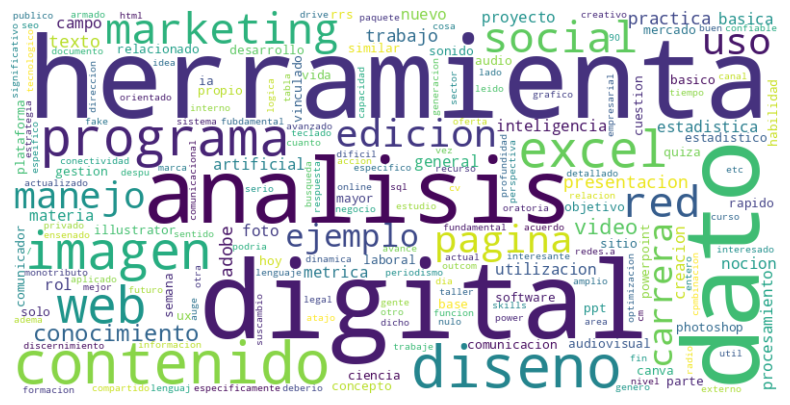

 herramienta: 24       manejo: 9          foto: 3       rapido: 2         vida: 2
     digital: 22      carrera: 8  inteligencia: 3   desarrollo: 2     concepto: 2
        dato: 21      ejemplo: 7    artificial: 3        sitio: 2           ux: 2
    analisis: 15 conocimiento: 7   estadistica: 3        parte: 2        audio: 2
   contenido: 15        video: 6         nuevo: 3      gestion: 2     software: 2
      diseno: 15 presentacion: 4   utilizacion: 3  illustrator: 2           ia: 2
    programa: 12        adobe: 4       materia: 3        canva: 2  estadistico: 2
      imagen: 12        texto: 4 procesamiento: 3  audiovisual: 2      similar: 2
       excel: 11      trabajo: 4         campo: 3 comunicacion: 2          hoy: 2
         web: 11     practica: 4           rol: 3    photoshop: 2  comunicador: 2
   marketing: 10      metrica: 3   relacionado: 2         base: 2        mayor: 2
         red: 10     creacion: 3       ciencia: 2          ppt: 2   plataforma: 2
      social: 10

In [12]:
df['rtas_p25_normalizada'] = df['respuestas_p25'].apply(lambda x: unidecode.unidecode(x).lower())

#print( df.head() )
# Unir todas las respuestas en un solo texto
texto_completo = ' '.join(df['rtas_p25_normalizada'].astype(str))
#print(texto_completo)

doc = nlp(texto_completo)

# Filtrar solo sustantivos y adjetivos, y normalizar palabras
sustantivos_adjetivos = [
    unidecode.unidecode(token.lemma_)  # Usar la lematización y eliminar acentos
    for token in doc if token.pos_ in {'NOUN', 'ADJ'}
]

# Contar ocurrencias
contador = Counter(sustantivos_adjetivos)

# Crear la nube de palabras solo con sustantivos y adjetivos
nube_palabras = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(contador)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')  # No mostrar los ejes
plt.show()




# Mostrar listado de palabras con su cantidad de ocurrencias
palabras = []
for palabra, cantidad in contador.most_common():
    if cantidad > 1:
      palabras.append(f"{palabra.rjust(12)}: {cantidad}")


cant_col_tabular = 5
largo_tabla = int( len(palabras) / cant_col_tabular )


df_tab = pd.DataFrame({
    'Columna 1': palabras[0:largo_tabla],
    'Columna 2': palabras[largo_tabla : largo_tabla * 2],
    'Columna 3': palabras[largo_tabla * 2:largo_tabla * 3],
    'Columna 4': palabras[largo_tabla * 3:largo_tabla * 4],
    'Columna 5': palabras[largo_tabla * 4:largo_tabla * 5],
})

print(df_tab.to_string(header=False, index=False))




## Formulación de categorías

A partir del ranking de palabras formulamos las siguientes categorías

- Análisis de datos
- Herramientas digitales
- Marketing
- Redes sociales
- Edición digital
- Diseño visual



In [13]:
dfCategorias = pd.DataFrame(columns=['categoria', 'palabras_claves', 'codigo'])

dataCategorias = [
 ["Análisis de datos", ["analisis", "datos", "estadisticas", "estadisticos", "programacion", "procesamiento", "data science", "power bi"], "analisis_datos"],
 ["Herramientas digitales", ["herramienta", "digital", "excel", "presentacion", "ia", "powerpoint", "inteligencia", "software", "word"], "herramientas_digitales"],
 ["Marketing", ["marketing", "digital", "seo"], "marketing"],
 ["Redes sociales", ["red", "social"], "redes_sociales"],
 ["Edición digital", ["edicion", "digital", "video", "audio", "imagen"], "edicion_digital"],
 ["Diseño visual", ["diseno", "web", "video", "grafico", "adobe", "pagina", "imagen", "contenido", "creacion", "photoshop"], "diseno_visual"]
]

for cat in dataCategorias:
  dfCategorias.loc[len(dfCategorias)] = cat

print(dfCategorias.to_string(index=False))



             categoria                                                                                    palabras_claves                 codigo
     Análisis de datos [analisis, datos, estadisticas, estadisticos, programacion, procesamiento, data science, power bi]         analisis_datos
Herramientas digitales          [herramienta, digital, excel, presentacion, ia, powerpoint, inteligencia, software, word] herramientas_digitales
             Marketing                                                                          [marketing, digital, seo]              marketing
        Redes sociales                                                                                      [red, social]         redes_sociales
       Edición digital                                                           [edicion, digital, video, audio, imagen]        edicion_digital
         Diseño visual               [diseno, web, video, grafico, adobe, pagina, imagen, contenido, creacion, photoshop]         

In [22]:
from IPython.display import display, HTML
# Asignamos a cada respuesta las categorías

for index, row in df.iterrows():
    respuesta_normalizada =  unidecode.unidecode(row['respuestas_p25']).lower()
    cat_respuestas = []
    if respuesta_normalizada != '':
      #print(">" + row['respuestas_p25']  )
      #print( ">" + respuesta_normalizada)
      for indexCat, rowCat in dfCategorias.iterrows():
        count = 0
        for palabra in rowCat['palabras_claves']:

          if palabra in respuesta_normalizada:
            count += 1
        if( count >= 2):
          #print( "   # " + rowCat['categoria'])
          cat_respuestas.append(rowCat['codigo'])
      #print("------------------------------------------------")
      #Asigna las primeras tres categorias a cada respuesta
    for index2, cat_r in enumerate(cat_respuestas):
        if index2 < 3:  # Solo tengo 3 variables para asignar
          df.at[index, f"P25_{index2 + 1}cod"] = cat_r

df.fillna('', inplace=True)
#print (df.head(15).to_string(index=False))

with pd.ExcelWriter(fileRespuestas, mode='a', engine='openpyxl',  if_sheet_exists='replace') as writer:
    df.to_excel(writer, sheet_name='Respuestas categorizadas', index=False)



respuestas_p25,P25_1cod,P25_2cod,P25_3cod
"Algunas relacionadas más específicamente con el marketing digital, estudio de métricas, SEO, html, por ejemplo.",marketing,,
Algunos programas de creación de presentaciones.,,,
Análisis de Datos,analisis_datos,,
Análisis de datos,analisis_datos,,
"Análisis y ciencias de datos,",analisis_datos,,
Aprender a usar excel,,,
"Aprender la logica de las redes sociales, prender donde buscar información actualizada sobre suscambios semana a semana y aprender cuestiones basicas de programación.",redes_sociales,,
Aprender los sistemas internos como funcionan,,,
Armar una página web,diseno_visual,,
Como crear una pagina web,diseno_visual,,


In [23]:
df_efectivas = df.query('respuestas_p25 != ""')
#print(df_efectivas)
#print(len(df_efectivas))

# Seleccionar solo las columnas que quieres mostrar
df_visible = df_efectivas[['respuestas_p25', 'P25_1cod', 'P25_2cod', 'P25_3cod']]

# Mostrar DataFrame como tabla HTML

# Estilos CSS para reducir el ancho de la primera columna
css = """
<style>
    .dataframe th:nth-child(1), .dataframe td:nth-child(1) {
        width: 50%;  /* Ajusta el ancho deseado */
    }
</style>
"""

display(HTML(css + df_visible.head(15).to_html(index=False)))




respuestas_p25,P25_1cod,P25_2cod,P25_3cod
"Algunas relacionadas más específicamente con el marketing digital, estudio de métricas, SEO, html, por ejemplo.",marketing,,
Algunos programas de creación de presentaciones.,,,
Análisis de Datos,analisis_datos,,
Análisis de datos,analisis_datos,,
"Análisis y ciencias de datos,",analisis_datos,,
Aprender a usar excel,,,
"Aprender la logica de las redes sociales, prender donde buscar información actualizada sobre suscambios semana a semana y aprender cuestiones basicas de programación.",redes_sociales,,
Aprender los sistemas internos como funcionan,,,
Armar una página web,diseno_visual,,
Como crear una pagina web,diseno_visual,,


 ### Distribución de las categorías sobre las respuestas

In [26]:
df_melted = df.melt(value_vars=['P25_1cod', 'P25_2cod', 'P25_3cod'])

# Contar los valores repetidos
repetidos = df_melted['value'].value_counts()

repetidos = repetidos.to_frame()
repetidos.reset_index(inplace=True)
repetidos.columns = ['Categoria', 'Casos']

repetidos['% sobre total'] = repetidos['Casos'] / (len(df)) * 100
repetidos['% respuestas emitidas'] = repetidos['Casos'] / 98 * 100
repetidos = repetidos.query('Categoria != ""')

repetidos = repetidos.sort_values(by='% sobre total', ascending=False)

# Mostrar los resultados
#print(repetidos)

display(HTML(repetidos.to_html(index=False)))

#print(f"\nTotal de respuestas por categoría: {totalCatRespuestas}")


Categoria,Casos,% sobre total,% respuestas emitidas
herramientas_digitales,30,20.270270,30.612245
diseno_visual,25,16.891892,25.510204
edicion_digital,23,15.540541,23.469388
analisis_datos,15,10.135135,15.306122
redes_sociales,9,6.081081,9.183673
marketing,8,5.405405,8.163265
